In [2]:
cd ..

C:\Users\Sommer Lab\Documents\Analysis Code


In [3]:
from ImageAnalysis import ImageAnalysisCode
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import rotate
import pandas as pd
import os
from scipy import ndimage

In [14]:
####################################
#Set the date and the folder name
####################################
dataRootFolder =r"D:\Dropbox (Lehigh University)\Sommer Lab Shared\Data"
date = '3/21/2024'

ODTfolder = 'Andor/ODT 1900'
MOTfolder = 'Andor/MOT 1900'

####################################
#Parameter Setting
####################################
repetition = 3 #The number of identical runs to be averaged.
subtract_burntin = 0
examNum = None #The number of runs to exam.
examFrom = None #Set to None if you want to check the last several runs. 
plotPWindow = 5
intermediatePlot = True
uniformscale = 0
rcParams = {'font.size': 10, 'xtick.labelsize': 9, 'ytick.labelsize': 9}
plt.rcParams['image.cmap'] = 'jet'

variablesToDisplay = [
                    # 'Coil_medB', 
                       'ODT Misalign', 
                       'ODT Position',
                      'ZSBiasCurrent',
                      'VerticalBiasCurrent',
                       'CamBiasCurrent'
                      ]
showTimestamp = False
# variablesToDisplay=None
textY = 1
textVA = 'bottom'

variableFilterList = None
variableFilterList = [
    # 'wait==50', 
    ] # NO SPACE around the operator!

pictureToHide = None
# pictureToHide = [0,1,2,3] 
# pictureToHide = list(range(0,10,2))

subtract_bg = 0
signal_feature = 'narrow' 
signal_width = 10 #The narrower the signal, the bigger the number.
fitbgDeg = 5
rotateAngle= 0.5 #rotates ccw

####################################
####################################
dayfolder = ImageAnalysisCode.GetDataLocation(date, DataPath=dataRootFolder)
ODTdataPath = os.path.join(dayfolder, ODTfolder)
MOTdataPath = os.path.join(dayfolder, MOTfolder)

examFrom, examUntil = ImageAnalysisCode.GetExamRange(examNum, examFrom, repetition)
params = ImageAnalysisCode.ExperimentParams(date, t_exp = 10e-6, picturesPerIteration=None, cam_type = "zyla")

ODT, ODTlog = ImageAnalysisCode.PreprocessZylaImg(ODTdataPath, subtract_burntin=0, rotateAngle=rotateAngle)
MOT, MOTlog = ImageAnalysisCode.PreprocessZylaImg(MOTdataPath, subtract_burntin=1, rotateAngle=rotateAngle)

	New side imaging


In [19]:
rowstart = 10
rowend = -10
columnstart = 10
columnend = -10

columnstart = 750
columnend = 1200

# rowstart =750 #ODT 2675
# rowend = 830
# # rowstart =616 #ODT1675
# # rowend = 651
rowstart =570 #ODT1900
rowend = 670
# # rowstart = 800 #ODT990
# # rowend = 835

# rowstart = 888 #ODT700
# rowend = 923
# rowstart = 1032 #ODT400
# rowend = 1068

# rowstart = 543 #ODT3400
# rowend = 578

rowstart -= 150
rowend += 50

ODTcrop = ODT[:, rowstart:rowend, columnstart:columnend]
MOTcrop = MOT[:, rowstart:rowend, columnstart:columnend]

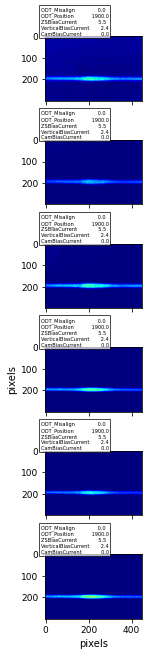

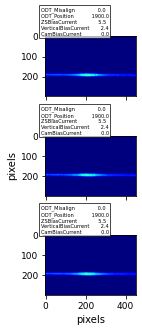

In [20]:
ImageAnalysisCode.plotImgAndFitResult(ODTcrop, variablesToDisplay=variablesToDisplay, variableLog=ODTlog, title=' ', plotPWindow=6 )

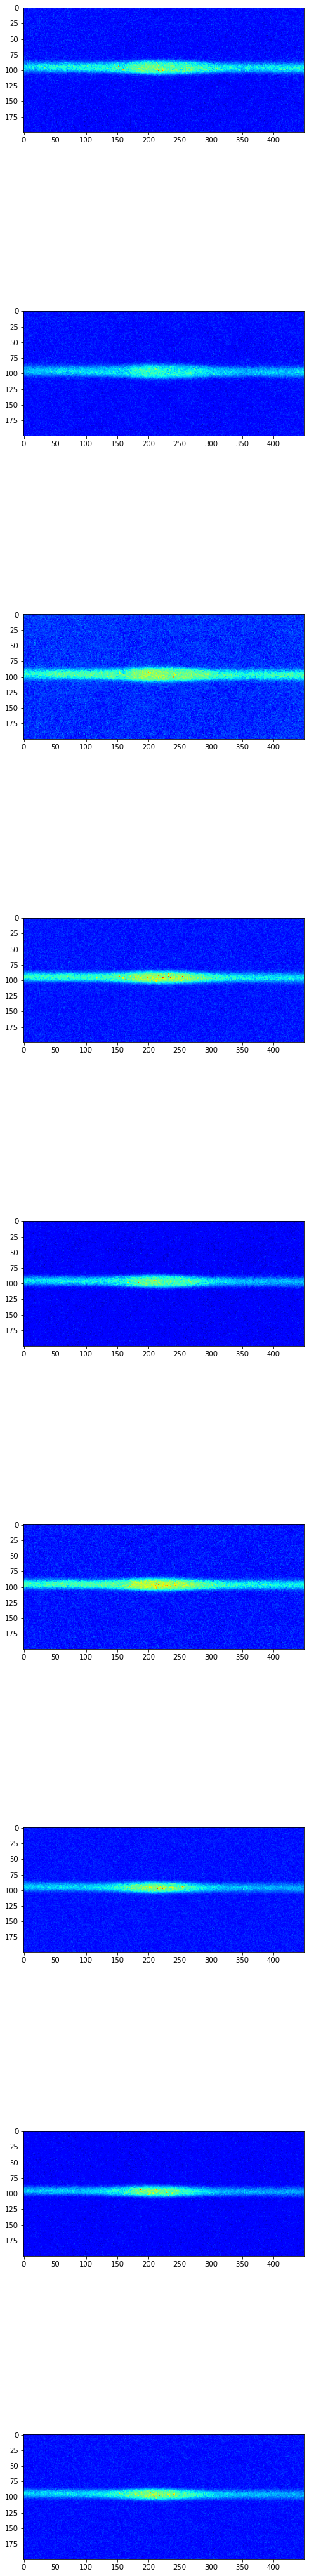

In [25]:
N = len(ODT)
fig, axes = plt.subplots(N, 1, figsize=(6, 6*N), layout='constrained')
for ii, ax in enumerate(axes):
    ax.imshow(ODT[ii], cmap='jet')

In [ ]:
# %%
imgs = ODTcolumnDensities.copy()

maxCoor = []
imgFiltered = np.zeros_like(imgs)
for ii, img in enumerate(imgs):
    imgFiltered[ii] = ndimage.gaussian_filter(img, sigma=10)
    thr = 0.9*(imgFiltered[ii].max() - imgFiltered[ii].min()) + imgFiltered.min()
    img[ imgFiltered[ii] < thr ] = 0
    maxCoor.append( ndimage.center_of_mass(img) )
    # maxCoor.append( np.unravel_index(imgFiltered[ii].argmax(), img.shape) )    
    
fig, axes = plt.subplots(5,2, figsize=(20,15), sharex=True, sharey=True, layout='constrained')
for ii, ax in enumerate(axes):
    ax[0].imshow(ODTcolumnDensities[ii])
    ax[0].scatter(*maxCoor[ii][::-1], marker='x')
    
    ax[1].imshow(imgs[ii])
    ax[1].scatter(*maxCoor[ii][::-1], marker='x', c='r')


# %% Filters
# if variableFilterList is not None and variableLog is not None:
#     filteredList = ImageAnalysisCode.VariableFilter(logTime, variableLog, variableFilterList)
#     images_array = np.delete(images_array, filteredList, 0)
#     logTime = np.delete(logTime, filteredList, 0)
#     fileFolder = np.delete(fileFolder, filteredList, 0)

# if pictureToHide is not None:
#     images_array = np.delete(images_array, pictureToHide, 0)
#     if logTime is not None:
#         logTime = np.delete(logTime, pictureToHide, 0)
#         fileFolder = np.delete(fileFolder, pictureToHide, 0)


# dx = params.camera.pixelsize_microns/params.magnification
# YcolumnDensities = columnDensities.sum(axis=2) * dx / 1e6**2

# popts = []
# bgs = []
# for ydata in YcolumnDensities:
#     popt, bg = ImageAnalysisCode.fitMultiGaussian(ydata, dx=dx, 
#                                                   subtract_bg=subtract_bg, signal_feature=signal_feature, 
#                                                   fitbgDeg=3, amp=1, width=3, denoise=0)
#     popts.append(popt)
#     bgs.append(bg)
    
# # XcolumnDensities = columnDensities.sum(axis=1) * dx / 1e6**2
# # poptsX = []
# # for xdata in XcolumnDensities:
# #     poptx,_ = ImageAnalysisCode.fitSingleGaussian(xdata, dx=dx,
# #                                                   subtract_bg=1, signal_feature='wide')
# #     poptsX.append(poptx)

# results = ImageAnalysisCode.AnalyseFittingResults(popts, logTime=logTime)

# if variableLog is not None:
#     results.insert(0, 'Folder', fileFolder)
#     results = results.join(variableLog.loc[logTime])
# # results.to_csv('0305.csv')

# %%
# if intermediatePlot:
    # ImageAnalysisCode.ShowImagesTranspose(images_array, uniformscale=False)
    # ImageAnalysisCode.plotImgAndFitResult(ODTcolumnDensities, popts, bgs=bgs, dx=dx, 
    #                                       plotPWindow=plotPWindow,
    #                                       variablesToDisplay = variablesToDisplay,
    #                                       variableLog=variableLog, logTime=variableLog.index,
    #                                       textLocationY=0.8, rcParams=rcParams)

    # xx = np.arange(len(imgs_oneD[0]))
    # fig, axes = plt.subplots(fileNo, 1, sharex=True, layout='constrained')
    # for ii in range(fileNo):        
    #     axes[ii].plot(imgs_oneD[ii], '.')
    #     axes[ii].plot(xx, ImageAnalysisCode.Gaussian(xx, *popt_Basler[ii]))
    #     axes[ii].text(0.9,0.8, files[ii], transform=axes[ii].transAxes)

    # c, w = np.array(popt_Basler).mean(axis=0)[1:-1]
    # axes[-1].set(xlim=[c-15*w, c+15*w])